In [3]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
data = pd.read_csv('C:/Users/sriji/MachineLearning/DemoDatasets/Lesson 7/shopping_data.csv')

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
CustomerID                200 non-null int64
Genre                     200 non-null object
Age                       200 non-null int64
Annual Income (k$)        200 non-null int64
Spending Score (1-100)    200 non-null int64
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [6]:
data.columns

Index(['CustomerID', 'Genre', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [7]:
data.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [8]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

le.fit(data['Genre'])

data['Genre'] = le.transform(data['Genre'])

In [9]:
data.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40


In [10]:
from sklearn.cluster import AgglomerativeClustering

from sklearn.metrics import pairwise_distances

In [35]:
data['Spending Score (1-100)'].unique()

array([39, 81,  6, 77, 40, 76, 94,  3, 72, 14, 99, 15, 13, 79, 35, 66, 29,
       98, 73,  5, 82, 32, 61, 31, 87,  4, 92, 17, 26, 75, 36, 28, 65, 55,
       47, 42, 52, 60, 54, 45, 41, 50, 46, 51, 56, 59, 48, 49, 53, 44, 57,
       58, 43, 91, 95, 11,  9, 34, 71, 88,  7, 10, 93, 12, 97, 74, 22, 90,
       20, 16, 89,  1, 78, 83, 27, 63, 86, 69, 24, 68, 85, 23,  8, 18],
      dtype=int64)

In [36]:
labels = data['Spending Score (1-100)']

In [37]:
len(data['Spending Score (1-100)'].unique())

84

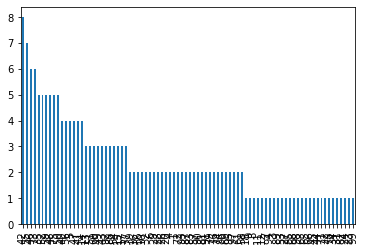

<Figure size 1440x720 with 0 Axes>

In [24]:
fig,ax = plt.subplots()
plt.figure(figsize=(20,10))

(data['Spending Score (1-100)'].value_counts()).plot(ax=ax, kind='bar')

In [26]:
model = AgglomerativeClustering(n_clusters=84,linkage='average',affinity='cosine')

In [27]:
model.fit(data)

AgglomerativeClustering(affinity='cosine', compute_full_tree='auto',
                        connectivity=None, distance_threshold=None,
                        linkage='average', memory=None, n_clusters=84,
                        pooling_func='deprecated')

In [28]:
model.labels_

array([59, 83, 79,  5, 71,  5, 41,  5, 45, 62, 57, 51, 75, 82, 52, 82, 66,
       69, 55, 81, 65, 69, 33, 64, 46, 69, 70, 32, 61, 76, 33, 13, 22, 56,
       43, 13, 47, 25, 63, 60, 73, 13, 27, 53, 58, 77, 29, 42, 49, 49, 16,
       72, 42, 29, 20, 20, 20, 78, 54, 20, 44, 38, 34, 16, 34, 38, 24, 34,
       38,  6, 34,  3, 12, 20, 12, 11, 24,  6, 67,  3, 12,  6, 26, 18, 67,
       18, 24, 67, 11, 18, 12, 23, 18,  1,  2,  4,  1,  4,  1,  4, 23,  1,
        3,  4, 17, 23, 10,  1, 10, 10, 10,  7, 48, 30, 30, 30, 80, 17, 31,
       17,  7, 48,  2, 21, 15, 19,  8, 21,  9, 35, 36, 35, 15,  7,  0, 19,
       36,  7,  0,  7,  9, 19, 15, 19,  0, 19,  8,  7, 50, 19, 39, 19, 39,
        7, 36, 19, 37,  7, 37,  7,  8,  7, 74, 19, 39,  7, 39, 19, 50, 30,
       68, 30, 68,  7, 36,  7, 36, 30, 36,  7, 50,  7, 68,  7, 50,  7, 39,
       30, 68,  7,  0, 30,  0,  4, 14, 23, 14, 40, 28, 40], dtype=int64)

In [29]:
print(np.unique(model.labels_))

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77 78 79 80 81 82 83]


In [31]:
len(np.unique(model.labels_))

84

In [38]:
labels = labels - 1

In [39]:
from sklearn.metrics import mean_squared_error

In [40]:
abs_error = np.sqrt(mean_squared_error(labels,model.labels_))

In [41]:
print(abs_error)

41.92379992319398
